# Spotter SD Card Data
This example uses data from a Sofar Spotter to illustrate how the spectral object may be used. We start by importing the relevant packages we are going to need. Note that most of the notebook contains plotting code- the calls to calculate things are usually contained on a single line.

In [1]:
from roguewavespectrum.spotter import read_spectral_csv
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np

We will start by reading in the data from the Spotter buoy. This Spotter was deployed at Ocean Beach San Francisco in the Fall of 2022, at about 18 m depth (see the example data directory).

In [2]:
spectrum = read_spectral_csv('./example_data',depth=18);

To explore the data lets start with plotting the significant wave height.

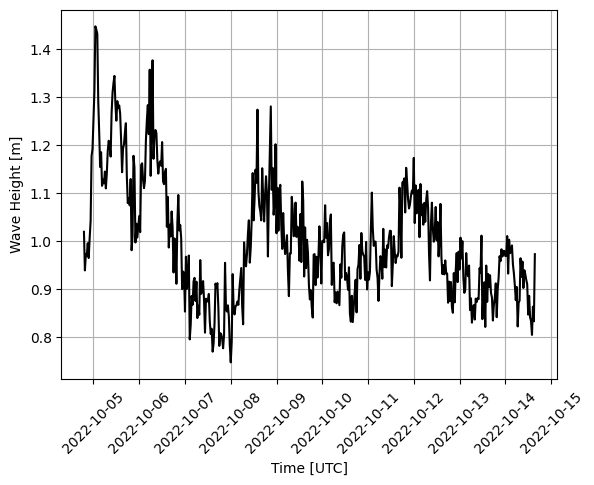

In [3]:
plt.plot(spectrum.time,spectrum.hm0(),'k')
plt.grid('on')
plt.xlabel('Time [UTC]')
plt.xticks(rotation=45)
plt.ylabel('Wave Height [m]');

Evidentally, the conditions were pretty mild during the deployment. Let's see if we can say something about the wave periods by plotting the mean and peak periods.

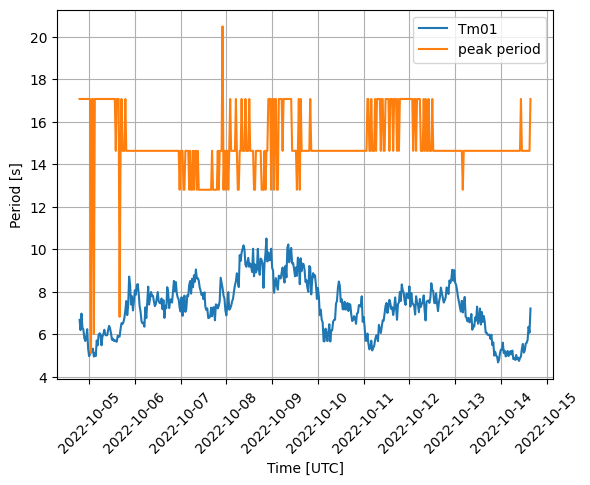

In [4]:
plt.plot(spectrum.time,spectrum.mean_period(),label='Tm01')
plt.plot(spectrum.time,spectrum.peak_period(),label='peak period')

plt.grid('on')
plt.xlabel('Time [UTC]')
plt.xticks(rotation=45)
plt.ylabel('Period [s]')
plt.legend();

The peak period is a little jumpy- let's see if we can use a different method to make things clearer (the spline method is a little slow ~3min on my macbook M2) 

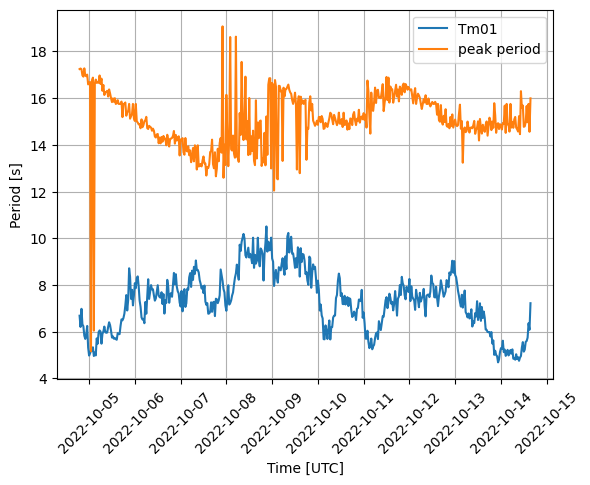

In [5]:
plt.plot(spectrum.time,spectrum.mean_period(),label='Tm01')
plt.plot(spectrum.time,spectrum.peak_period(use_spline=True),label='peak period')

plt.grid('on')
plt.xlabel('Time [UTC]')
plt.xticks(rotation=45)
plt.ylabel('Period [s]')
plt.legend();

To get more feeling for what is going on we want to plot the spectrum at 2022-10-09. Let's select that specific spectrum first. We can use the `sel` method for that- which allows us to select the spectrum at a specific coordinate instance. Let's select the spectrum, and lets plot it.

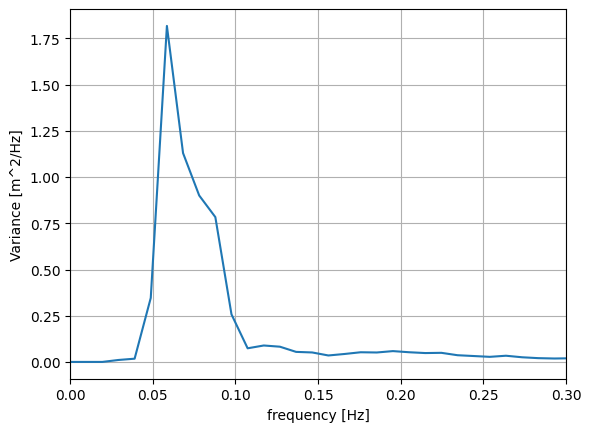

In [6]:
spec1d = spectrum.sel(time=datetime(2022,10,9),method='nearest')
plt.plot( spec1d.frequency,spec1d.variance_density)

plt.xlim([0,0.3])
plt.grid('on')
plt.xlabel('frequency [Hz]')
plt.ylabel('Variance [m^2/Hz]');

It looks like we are dealing with a swell spectrum, though it seems there may or may not be two fields present. Let's look at a directional estimate to see if that clear things up. To that end we call the `as_frequency_direction_spectrum` on the (interpolated) spectrum. By default this will use the MeM2 method to create an estimate of the 2D spectrum from the 1D data. Here I will create data with 72 directions.

In [7]:
spec2d = spec1d.as_frequency_direction_spectrum(144);

To plot the date, lets define a simple polar plotting function, and use it to plot both the results.

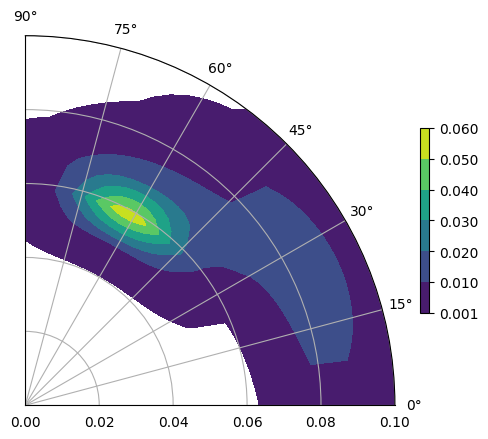

In [8]:
fig, ax = plt.subplots(1,1,subplot_kw=dict(projection='polar'))

theta = np.deg2rad(spec2d.direction())
im = ax.contourf(theta, spec2d.frequency, spec2d.values, cmap='viridis',levels=[0.001,0.01,0.02,0.03,0.04,0.05,0.06])

ax.set_ylim([0,0.1])
ax.set_xlim([0,np.pi/2])
ax.set_theta_zero_location("E")
ax.grid('on')
plt.colorbar(im,shrink=0.5);